<h1> ANOVA feature selection method</h1>

In [12]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from timeit import default_timer
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_preprocessed = pd.read_excel("game_reviews_preprocessed.xlsx", index_col=0)

In [3]:
df_preprocessed

,review,voted_up
37439,zeskalowanie świat tracić niemal zupełnie sens...,False
1414,totalny dno kolejka hdodanie serwer wcale nie ...,False
12728,dobra typ gracz nudzić samotny biegać kopalnia...,True
11891,fajny poczuć pikselowym świat otoczyć szlam zo...,True
20635,raz zaczynać sezon niepotrzebny stres niepotrz...,False
...,...,...
37771,tył czas zmarnować internet cholerstwo nie chc...,False
73100,skórka cena gem tragedia dobierać gracz meczeć...,False
4761,ciągły wywalać kolejka kolejka kompania gracz ...,False
41470,naprawdę nieudany postać sporo tył odblokować ...,False


In [4]:
df_preprocessed.drop_duplicates(subset=['review'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['voted_up'], test_size=0.3, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
tfidf_tokens = vectorizer.get_feature_names()

print(X_train.shape)
X_train = pd.DataFrame(X_train.toarray(), columns=tfidf_tokens)
X_train.head()

(2554, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_test = vectorizer.transform(X_test)
# tfidf_tokens = vectorizer.get_feature_names()

print(X_test.shape)
X_test = pd.DataFrame(X_test.toarray(), columns=tfidf_tokens)
X_test.head()

(1095, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
all_k = [i for i in range(500, 3000, 500)]
all_selectors = []

for k in all_k:
    print(f"> Fitting SelectKBest selector with score func ANOVA for {k} features")
    selector = SelectKBest(score_func=f_classif, k=k)
    selector = selector.fit(X_train, y_train)
    all_selectors.append(selector)

> Fitting SelectKBest selector with score func ANOVA for 500 features
> Fitting SelectKBest selector with score func ANOVA for 1000 features
> Fitting SelectKBest selector with score func ANOVA for 1500 features
> Fitting SelectKBest selector with score func ANOVA for 2000 features
> Fitting SelectKBest selector with score func ANOVA for 2500 features


<h3> MultinomialNB </h3>

> Training and evaluating MultinomialNB model for 1 selector with 500 features
0.008936200000000838
> Training and evaluating MultinomialNB model for 2 selector with 1000 features
0.004939999999997724
> Training and evaluating MultinomialNB model for 3 selector with 1500 features
0.004346900000001597
> Training and evaluating MultinomialNB model for 4 selector with 2000 features
0.005313700000002086
> Training and evaluating MultinomialNB model for 5 selector with 2500 features
0.008444699999998306
Best k is 2000 with score 0.8356164383561644, recall 0.7787769784172662 and specifity 0.8942486085343229
              precision    recall  f1-score   support

       False       0.80      0.89      0.84       539
        True       0.88      0.78      0.83       556

    accuracy                           0.84      1095
   macro avg       0.84      0.84      0.84      1095
weighted avg       0.84      0.84      0.84      1095

[[482  57]
 [123 433]]


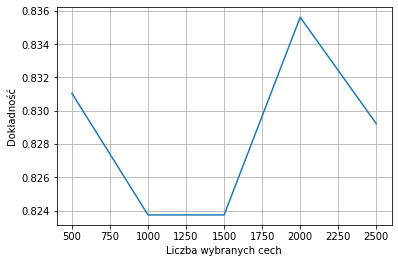

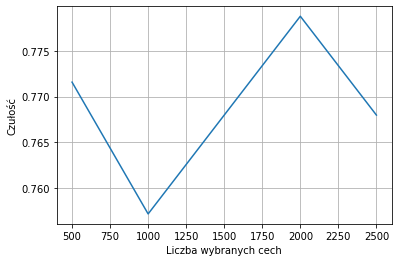

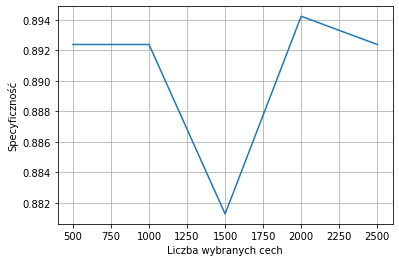

In [8]:
all_scores_MultinomialNB = []
all_specifity_MultinomialNB = []
all_recall_MultinomialNB = []
all_classif_times_MultinomialNB = []
score_best_MultinomialNB = 0
specifity_best_MultinomialNB = 0
recall_best_MultinomialNB = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating MultinomialNB model for {count} selector with {X_test_new.shape[1]} features")
    
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    model = GridSearchCV(MultinomialNB(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_MultinomialNB.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_MultinomialNB.append(score)
    all_specifity_MultinomialNB.append(specificity)
    all_recall_MultinomialNB.append(recall)

    if score > score_best_MultinomialNB:
        score_best_MultinomialNB = score
        specifity_best_MultinomialNB = specificity
        recall_best_MultinomialNB = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_MultinomialNB = model
        best_features_MultinomialNB = sel


print(f"Best k is {k_best} with score {score_best_MultinomialNB}, recall {recall_best_MultinomialNB} and specifity {specifity_best_MultinomialNB}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3> SVC </h3>

> Training and evaluating SVC model for 1 selector with 500 features
0.46792859999999337
> Training and evaluating SVC model for 2 selector with 1000 features
0.9927544999999895
> Training and evaluating SVC model for 3 selector with 1500 features
1.854734399999984
> Training and evaluating SVC model for 4 selector with 2000 features
2.676119100000051
> Training and evaluating SVC model for 5 selector with 2500 features
3.705526299999974
Best k is 1000 with score 0.8447488584474886, recall 0.7949640287769785 and specifity 0.8961038961038961
              precision    recall  f1-score   support

       False       0.81      0.90      0.85       539
        True       0.89      0.79      0.84       556

    accuracy                           0.84      1095
   macro avg       0.85      0.85      0.84      1095
weighted avg       0.85      0.84      0.84      1095

[[483  56]
 [114 442]]


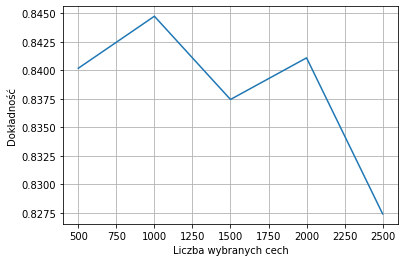

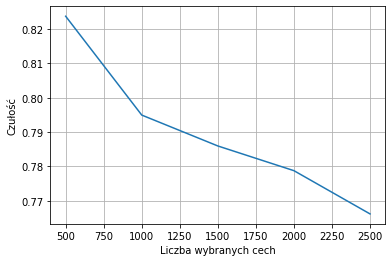

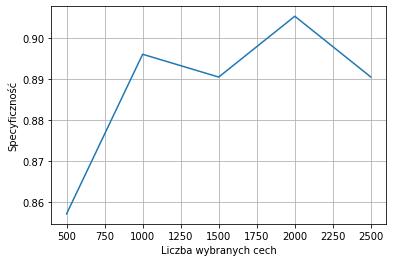

In [9]:
all_scores_SVC = []
all_specifity_SVC = []
all_recall_SVC = []
all_classif_times_SVC = []
score_best_SVC = 0
specifity_best_SVC = 0
recall_best_SVC = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating SVC model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001]}

    model = GridSearchCV(SVC(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_SVC.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_SVC.append(score)
    all_specifity_SVC.append(specificity)
    all_recall_SVC.append(recall)

    if score > score_best_SVC:
        score_best_SVC = score
        specifity_best_SVC = specificity
        recall_best_SVC = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_SVC = model
        best_features_SVC = sel


print(f"Best k is {k_best} with score {score_best_SVC}, recall {recall_best_SVC} and specifity {specifity_best_SVC}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3> LogisticRegression </h3>

> Training and evaluating LogisticRegression model for 1 selector with 500 features
0.001011999999946056
> Training and evaluating LogisticRegression model for 2 selector with 1000 features
0.002577700000074401
> Training and evaluating LogisticRegression model for 3 selector with 1500 features
0.00529299999993782
> Training and evaluating LogisticRegression model for 4 selector with 2000 features
0.0043046000000686035
> Training and evaluating LogisticRegression model for 5 selector with 2500 features
0.0062433999999029766
Best k is 1000 with score 0.8547945205479452, recall 0.8561151079136691 and specifity 0.8534322820037106
              precision    recall  f1-score   support

       False       0.85      0.85      0.85       539
        True       0.86      0.86      0.86       556

    accuracy                           0.85      1095
   macro avg       0.85      0.85      0.85      1095
weighted avg       0.85      0.85      0.85      1095

[[460  79]
 [ 80 476]]


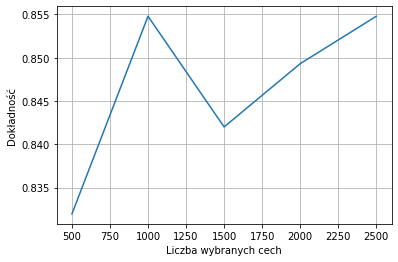

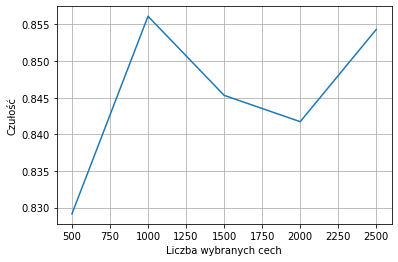

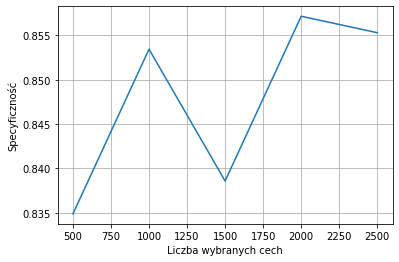

In [10]:
all_scores_LogisticRegression = []
all_specifity_LogisticRegression = []
all_recall_LogisticRegression = []
all_classif_times_LogisticRegression = []
score_best_LogisticRegression = 0
specifity_best_LogisticRegression = 0
recall_best_LogisticRegression = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating LogisticRegression model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2', 'elasticnet']}

    model = GridSearchCV(LogisticRegression(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_LogisticRegression.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_LogisticRegression.append(score)
    all_specifity_LogisticRegression.append(specificity)
    all_recall_LogisticRegression.append(recall)

    if score > score_best_LogisticRegression:
        score_best_LogisticRegression = score
        specifity_best_LogisticRegression = specificity
        recall_best_LogisticRegression = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_LogisticRegression = model
        best_features_LogisticRegression = sel


print(f"Best k is {k_best} with score {score_best_LogisticRegression}, recall {recall_best_LogisticRegression} and specifity {specifity_best_LogisticRegression}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3>RandomForestClassifier</h3>

> Training and evaluating RandomForestClassifier model for 1 selector with 500 features
0.03142019999995682
> Training and evaluating RandomForestClassifier model for 2 selector with 1000 features
0.14200239999991027
> Training and evaluating RandomForestClassifier model for 3 selector with 1500 features
0.18932410000024902
> Training and evaluating RandomForestClassifier model for 4 selector with 2000 features
0.3837776999998823
> Training and evaluating RandomForestClassifier model for 5 selector with 2500 features
0.19731569999976273
Best k is 2000 with score 0.8191780821917808, recall 0.8381294964028777 and specifity 0.7996289424860853
              precision    recall  f1-score   support

       False       0.83      0.80      0.81       539
        True       0.81      0.84      0.82       556

    accuracy                           0.82      1095
   macro avg       0.82      0.82      0.82      1095
weighted avg       0.82      0.82      0.82      1095

[[431 108]
 [ 90 466]]


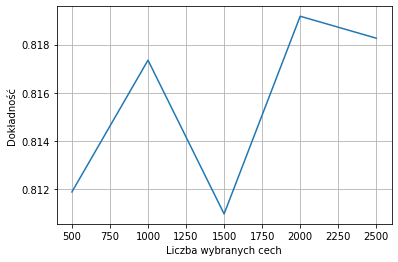

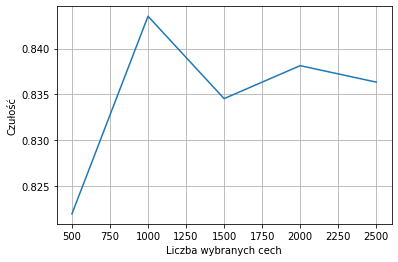

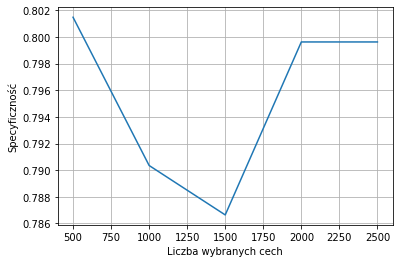

In [11]:
all_scores_RandomForestClassifier = []
all_specifity_RandomForestClassifier = []
all_recall_RandomForestClassifier = []
all_classif_times_RandomForestClassifier = []
score_best_RandomForestClassifier = 0
specifity_best_RandomForestClassifier = 0
recall_best_RandomForestClassifier = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating RandomForestClassifier model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'n_estimators': [100, 200, 400, 600]}

    model = GridSearchCV(RandomForestClassifier(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_RandomForestClassifier.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_RandomForestClassifier.append(score)
    all_specifity_RandomForestClassifier.append(specificity)
    all_recall_RandomForestClassifier.append(recall)

    if score > score_best_RandomForestClassifier:
        score_best_RandomForestClassifier = score
        specifity_best_RandomForestClassifier = specificity
        recall_best_RandomForestClassifier = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_RandomForestClassifier = model
        best_features_RandomForestClassifier = sel


print(f"Best k is {k_best} with score {score_best_RandomForestClassifier}, recall {recall_best_RandomForestClassifier} and specifity {specifity_best_RandomForestClassifier}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

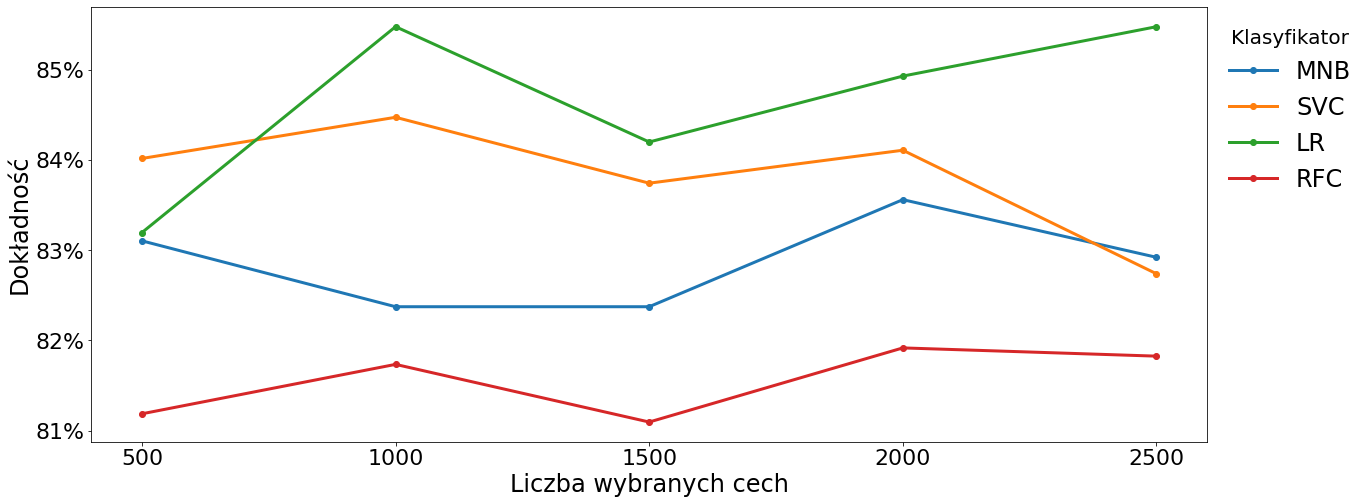

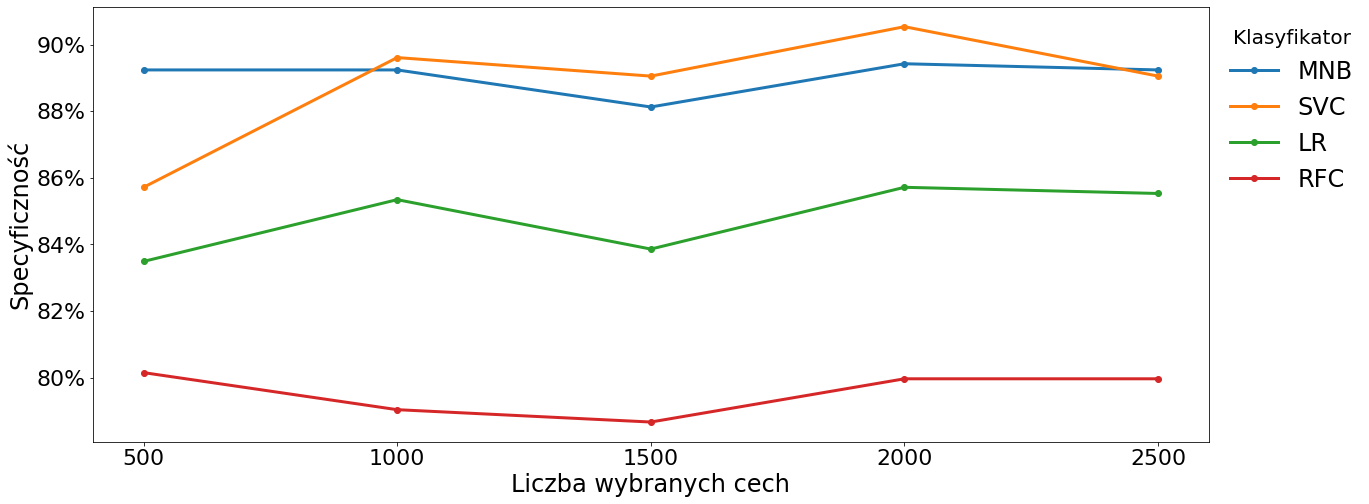

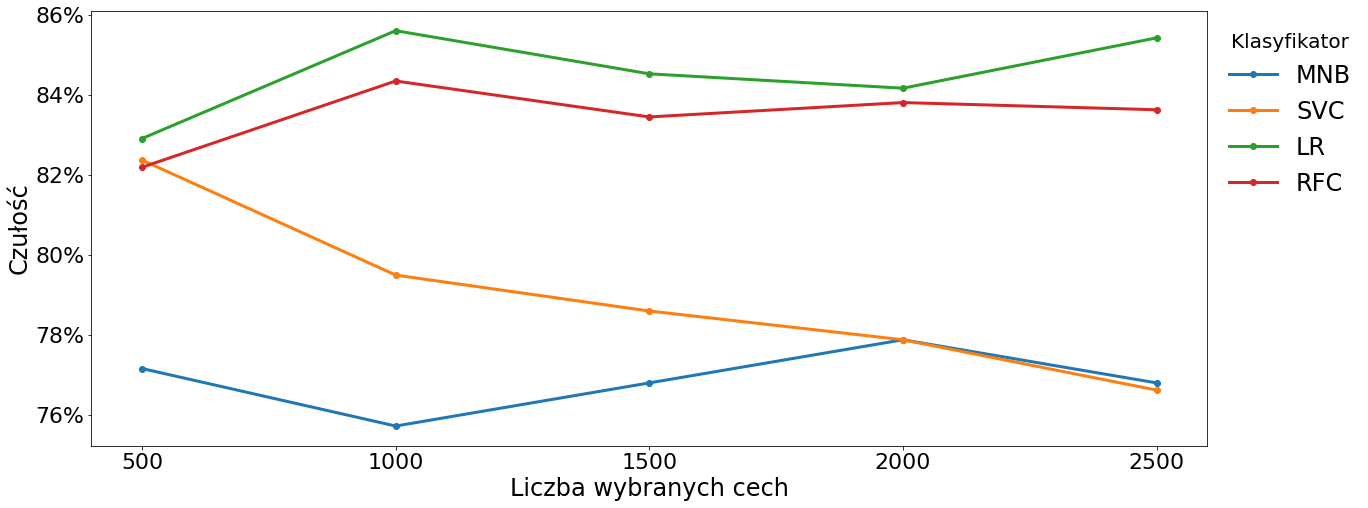

In [13]:
plt.figure(figsize=(20, 8))
fmt = '%2.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)
plt.plot(all_k, [x*100 for x in all_scores_MultinomialNB], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_scores_SVC], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_scores_LogisticRegression], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_scores_RandomForestClassifier], '-o', linewidth=3)

plt.xticks(all_k)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":24}, title="Klasyfikator", title_fontsize=20, bbox_to_anchor=(1, 1), frameon=False)
plt.xlabel("Liczba wybranych cech", fontsize=24)
plt.ylabel("Dokładność", fontsize=24)
# plt.title("Porównanie dokładności modeli dla metody selekcji cech ANOVA", fontsize=22)
# plt.grid()
plt.tick_params(axis='both', labelsize=22)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\anova_accuracy.eps', format='eps', dpi=1200)

plt.figure(figsize=(20, 8))

plt.gca().yaxis.set_major_formatter(yticks)
plt.plot(all_k, [x*100 for x in all_specifity_MultinomialNB], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_specifity_SVC], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_specifity_LogisticRegression], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_specifity_RandomForestClassifier], '-o', linewidth=3)

plt.xticks(all_k)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":24}, title="Klasyfikator", title_fontsize=20, bbox_to_anchor=(1, 1), frameon=False)
plt.xlabel("Liczba wybranych cech", fontsize=24)
plt.ylabel("Specyficzność", fontsize=24)
# plt.title("Porównanie specyficzności modeli dla metody selekcji cech ANOVA", fontsize=22)
# plt.grid()
plt.tick_params(axis='both', labelsize=22)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\anova_specifity.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(20, 8))

plt.gca().yaxis.set_major_formatter(yticks)
plt.plot(all_k, [x*100 for x in all_recall_MultinomialNB], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_recall_SVC], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_recall_LogisticRegression], '-o', linewidth=3)
plt.plot(all_k, [x*100 for x in all_recall_RandomForestClassifier], '-o', linewidth=3)

plt.xticks(all_k)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":24}, title="Klasyfikator", title_fontsize=20, bbox_to_anchor=(1, 1), frameon=False)
plt.xlabel("Liczba wybranych cech", fontsize=24)
plt.ylabel("Czułość", fontsize=24)
# plt.title("Porównanie czułości modeli dla metody selekcji cech ANOVA", fontsize=22)
# plt.grid()
plt.tick_params(axis='both', labelsize=22)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\anova_recall.eps', format='eps', dpi=1200)
plt.show()

In [15]:
pd.DataFrame(np.array([all_classif_times_MultinomialNB, all_classif_times_SVC, all_classif_times_LogisticRegression, all_classif_times_RandomForestClassifier]), index=["MNB", "SVC", "LR", "RFC"], columns=all_k)

,500,1000,1500,2000,2500
MNB,0.001343,0.002458,0.003493,0.004556,0.006673
SVC,0.435248,1.027812,1.764440,2.717220,3.328620
LR,0.001216,0.002327,0.004137,0.003646,0.005676
RFC,0.224724,0.084179,0.120674,0.056343,0.061053
